# DLProfile Example using FRNN

## Set imports and neccessary environment variables

In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [2]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.parent.parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [4]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [5]:
from src.vanidl import VaniDL
profile = VaniDL()

In [6]:
#import shutil
#shutil.rmtree('/tmp/temp_analysis')

In [7]:
DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/apps/frnn/frnn_run3_p8.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

Loaded Pre-processed DXT DF from file: /tmp/temp_analysis/frnn_run3_p8_io_dxt_df.csv
Loaded Pre-processed DF from file: /tmp/temp_analysis/frnn_run3_p8_io_df.csv
Loaded Pre-processed Pattern file: /tmp/temp_analysis/frnn_run3_p8_pattern.json
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [8]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())

'Files used in the application'
['/home/dhari/.cache/matplotlib/fontlist-v310.json',
 '/home/dhari/.keras/keras.json',
 '/proc/self/auxv',
 '/gpfs/mira-home/felker/deephyper/deephyper.egg-info/PKG-INFO',
 '/tmp/cjngav54',
 '/dev/urandom',
 '/proc/cpuinfo',
 '/projects/datascience/dhari/processed_shotlists/d3d_0D/shot_lists_signal_group_274046652389426782036862662489435313687.npz',
 '/projects/datascience/dhari/shot_lists/d3d_clear_data_avail.txt',
 '/projects/datascience/dhari/shot_lists/d3d_disrupt_data_avail.txt',
 '/projects/datascience/dhari/normalization/normalization_signal_group_274046652389426782036862662489435313687.npz',
 '/projects/datascience/dhari/model_checkpoints/model.65818591086833496998924740303305150660._epoch_.2.h5',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_139553.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_139561.npz',
 '/projects/datascien

 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_161187.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_161188.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_161198.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_161202.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_161203.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_161261.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_161263.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_161278.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_2740466523894

 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_158589.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_158590.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_158592.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_158593.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_158597.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_158598.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_158599.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_158602.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_2740466523894

In [9]:
df_normal = profile.GetTraceAsDF()
pp.pprint("Files used in the application")
pp.pprint(df_normal['Filename'].unique().tolist())

'Files used in the application'
['/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_147210.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_161505.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_139613.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_146651.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_146615.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_144768.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_162749.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_162724.npz',
 '/projects/datascience/dhari/processed_

 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_150456.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_153154.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_159546.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_164322.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_150817.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_149717.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_159335.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_158021.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_2740466523894

 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_160159.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_160603.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_155212.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_155153.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_161450.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_161167.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_165466.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_154837.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_2740466523894

 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_158113.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_157526.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_166517.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_162722.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_157378.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_165863.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_163317.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_166525.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_2740466523894

 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_157471.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_162348.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_163036.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_164337.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_166094.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_166319.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_166465.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_162785.npz',
 '/projects/datascience/dhari/processed_shots/signal_group_2740466523894

### Collect the summary of the Application

In [10]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	612.00 seconds
Time spent in I/O		:	51.59 seconds
% Time spent in I/O		:	8.43%
Total Data Accessed		:	18.33 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read' 'write']
# of files used			:	2607
# of MPI Ranks			:	8 ranks
Data Transfer size:
	Min,Max			:	0 bytes and 34868910 bytes
	Average			:	1023410 bytes
	Median			:	255 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	0 B/s and 6104 MB/s
	Average			:	415 MB/s
	Median			:	0 MB/s
Access Pattern:
	Sequential		:	34.76%
	Consecutive		:	24.78%


Files Summary:
File Types			:	['json' '' 'egg-info/PKG-INFO' 'npz' 'txt' 'h5']
Dataset Size:
	Total			:	9.479 GB
	Min,Max			:	0.000 GB and 0.378 GB
	Average			:	0.004 GB


In [11]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 612.0 seconds'


In [12]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()))

'Time spent by application on I/O: 51.59185 seconds'


### I/O time spent on each file

In [13]:
for file in df_normal['Filename'].unique()[:8]:
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_147210.npz: 0.09 seconds
I/O time for file /projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_161505.npz: 0.16 seconds
I/O time for file /projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_139613.npz: 0.05 seconds
I/O time for file /projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_146651.npz: 0.08 seconds
I/O time for file /projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_146615.npz: 0.20 seconds
I/O time for file /projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_144768.npz: 0.10 seconds
I/O time for file /projects/datascience/dhari/processed_shots/signal_group_274046652389426782036862662489435313687/d3d_162749.npz: 0.08 

### I/O Time spent per rank

In [14]:
for rank in df['Rank'].unique()[:8]:
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 60.39 seconds
I/O time for rank 1: 54.96 seconds
I/O time for rank 2: 58.71 seconds
I/O time for rank 3: 63.19 seconds
I/O time for rank 4: 60.35 seconds
I/O time for rank 5: 58.23 seconds
I/O time for rank 6: 34.96 seconds
I/O time for rank 7: 21.94 seconds


In [15]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 18.33 GB'

### I/O performed on each file

In [16]:
for file in df['Filename'].unique()[:8]:
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /home/dhari/.cache/matplotlib/fontlist-v310.json: 0.36 MB
I/O performed on file /home/dhari/.keras/keras.json: 0.00 MB
I/O performed on file /proc/self/auxv: 0.00 MB
I/O performed on file /gpfs/mira-home/felker/deephyper/deephyper.egg-info/PKG-INFO: 0.12 MB
I/O performed on file /tmp/cjngav54: 0.00 MB
I/O performed on file /dev/urandom: 0.00 MB
I/O performed on file /proc/cpuinfo: 0.02 MB
I/O performed on file /projects/datascience/dhari/processed_shotlists/d3d_0D/shot_lists_signal_group_274046652389426782036862662489435313687.npz: 123.77 MB


In [17]:
for rank in df['Rank'].unique()[:8]:
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 3145.87 MB
I/O performed by rank 1: 2585.09 MB
I/O performed by rank 2: 2603.58 MB
I/O performed by rank 3: 2789.64 MB
I/O performed by rank 4: 2736.96 MB
I/O performed by rank 5: 2778.64 MB
I/O performed by rank 6: 1789.41 MB
I/O performed by rank 7: 945.38 MB


In [18]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'PKG-INFO': 7631.0,
 'auxv': 0.0,
 'callbacks-2020-07-09-06-41-37': 0.0,
 'cpuinfo': 0.0,
 'd3d_139547': 2946361.0,
 'd3d_139553': 2373776.0,
 'd3d_139561': 4756980.0,
 'd3d_139564': 4715186.0,
 'd3d_139565': 4822650.0,
 'd3d_139569': 4836036.0,
 'd3d_139572': 2215320.0,
 'd3d_139573': 1911587.0,
 'd3d_139592': 2919648.0,
 'd3d_139593': 4805279.0,
 'd3d_139595': 4511099.0,
 'd3d_139596': 4095420.0,
 'd3d_139598': 3001854.0,
 'd3d_139600': 4743226.0,
 'd3d_139601': 4813429.0,
 'd3d_139602': 4776457.0,
 'd3d_139603': 4828186.0,
 'd3d_139605': 4775207.0,
 'd3d_139606': 4734070.0,
 'd3d_139610': 1749188.0,
 'd3d_139612': 449523.0,
 'd3d_139613': 1632206.0,
 'd3d_139890': 4710860.0,
 'd3d_139892': 1114567.0,
 'd3d_139894': 4574310.0,
 'd3d_139896': 4457613.0,
 'd3d_140736': 4478313.0,
 'd3d_140741': 3732134.0,
 'd3d_141045': 4710295.0,
 'd3d_141050': 3642574.0,
 'd3d_141053': 3423495.0,
 'd3d_141062': 3727834.0,
 'd3d_141377': 4647046.0,
 'd3d_141378': 4565464.0,
 '

 'd3d_160445': 2708291.0,
 'd3d_160449': 4231421.0,
 'd3d_160450': 4331573.0,
 'd3d_160451': 4253141.0,
 'd3d_160452': 4386781.0,
 'd3d_160454': 4243081.0,
 'd3d_160455': 4427389.0,
 'd3d_160456': 4393398.0,
 'd3d_160457': 4406726.0,
 'd3d_160458': 4326039.0,
 'd3d_160460': 4021146.0,
 'd3d_160461': 4004198.0,
 'd3d_160464': 4043335.0,
 'd3d_160466': 4298098.0,
 'd3d_160467': 4335765.0,
 'd3d_160468': 4412820.0,
 'd3d_160474': 4381423.0,
 'd3d_160476': 4333338.0,
 'd3d_160478': 4367069.0,
 'd3d_160484': 3173105.0,
 'd3d_160485': 4748102.0,
 'd3d_160486': 4686944.0,
 'd3d_160487': 4527832.0,
 'd3d_160488': 4645566.0,
 'd3d_160489': 4580624.0,
 'd3d_160490': 4678704.0,
 'd3d_160492': 4809377.0,
 'd3d_160493': 4700289.0,
 'd3d_160494': 4544074.0,
 'd3d_160497': 4642652.0,
 'd3d_160499': 4725771.0,
 'd3d_160500': 4832869.0,
 'd3d_160503': 4780853.0,
 'd3d_160504': 4761096.0,
 'd3d_160505': 4623614.0,
 'd3d_160508': 4716229.0,
 'd3d_160510': 4718533.0,
 'd3d_160511': 4503110.0,
 'd3d_160578

 'd3d_165673': 3907665.0,
 'd3d_165675': 4778653.0,
 'd3d_165683': 4851153.0,
 'd3d_165684': 2576512.0,
 'd3d_165689': 2831461.0,
 'd3d_165690': 2605912.0,
 'd3d_165692': 4827359.0,
 'd3d_165694': 786118.0,
 'd3d_165707': 4613713.0,
 'd3d_165708': 4516940.0,
 'd3d_165709': 1069443.0,
 'd3d_165710': 4465737.0,
 'd3d_165714': 1476136.0,
 'd3d_165717': 611100.0,
 'd3d_165720': 4533127.0,
 'd3d_165721': 4521171.0,
 'd3d_165724': 2434370.0,
 'd3d_165725': 4602402.0,
 'd3d_165728': 2370878.0,
 'd3d_165730': 2850002.0,
 'd3d_165733': 2177192.0,
 'd3d_165743': 3646258.0,
 'd3d_165744': 3461786.0,
 'd3d_165745': 3470362.0,
 'd3d_165746': 3485439.0,
 'd3d_165747': 3654322.0,
 'd3d_165748': 3433859.0,
 'd3d_165749': 3524007.0,
 'd3d_165750': 3663650.0,
 'd3d_165751': 3631207.0,
 'd3d_165753': 2981161.0,
 'd3d_165754': 3542286.0,
 'd3d_165758': 3418547.0,
 'd3d_165759': 3557592.0,
 'd3d_165760': 3664632.0,
 'd3d_165762': 3600391.0,
 'd3d_165768': 3509102.0,
 'd3d_165769': 3615344.0,
 'd3d_165770':

### How application access data over time.

[============================================================] 100.0% 19851 of 19851 Creating Timeline 


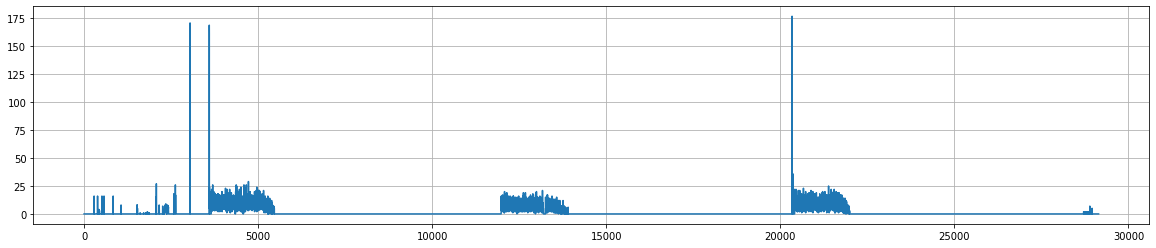

In [19]:
tl = profile.CreateIOTimeline()
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(tl['time_step'], tl['operation_count']);

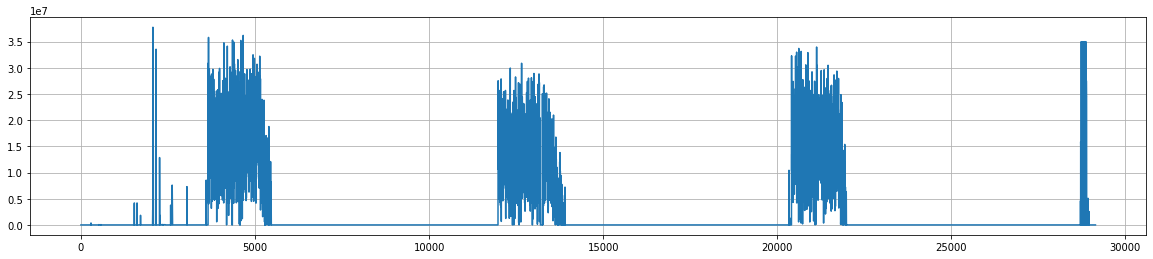

In [20]:
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

[============================================================] 100.0% 16 of 16 Creating Timeline 


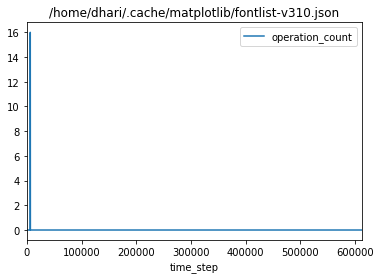

[============================================================] 100.0% 32 of 32 Creating Timeline 


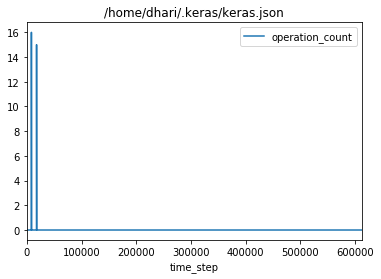

[============================================================] 100.0% 16 of 16 Creating Timeline 


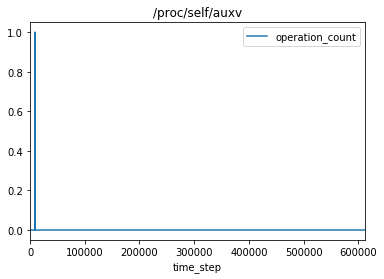

[============================================================] 100.0% 32 of 32 Creating Timeline 


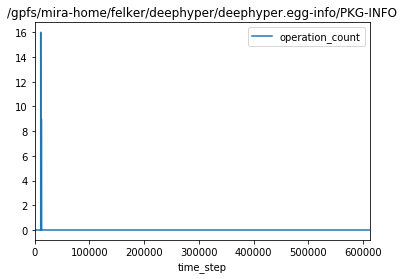


[============================================================] 100.0% 1 of 1 Creating Timeline 


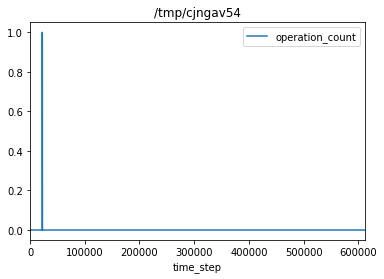

[============================================================] 100.0% 8 of 8 Creating Timeline 


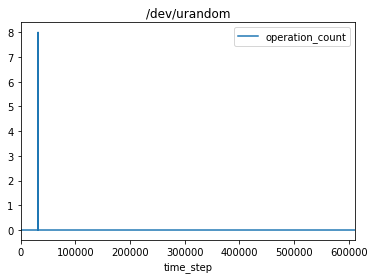

[============================================================] 100.0% 8 of 8 Creating Timeline 


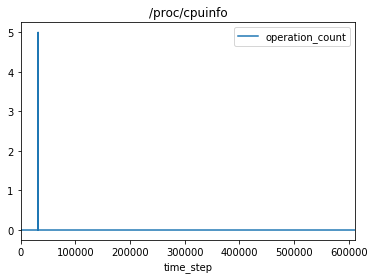

[============================================================] 100.0% 72 of 72 Creating Timeline 


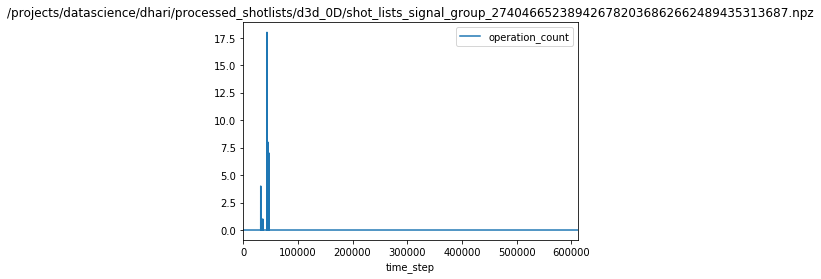

[============================================================] 100.0% 396 of 396 Creating Timeline 


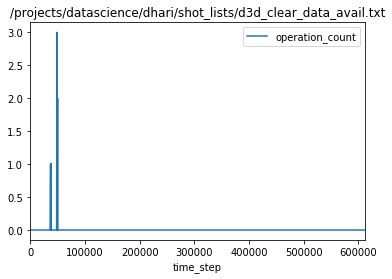

[============================================================] 100.0% 216 of 216 Creating Timeline 


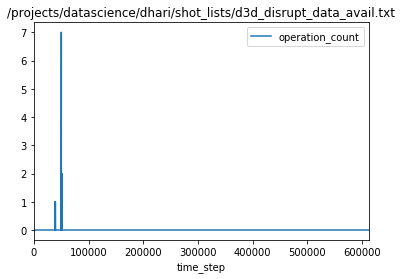

[============================================================] 100.0% 162 of 162 Creating Timeline 


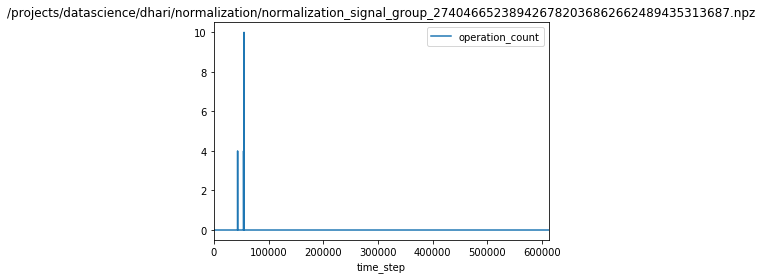

[============================================================] 100.0% 1392 of 1392 Creating Timeline 


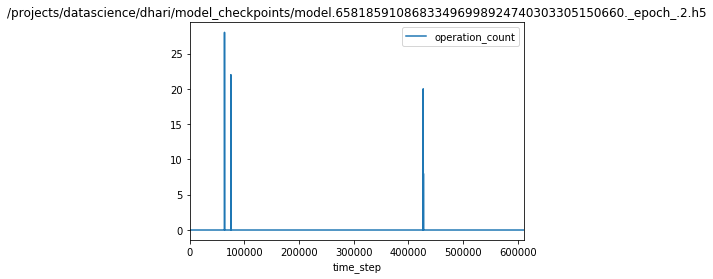

[============================================================] 100.0% 6 of 6 Creating Timeline 


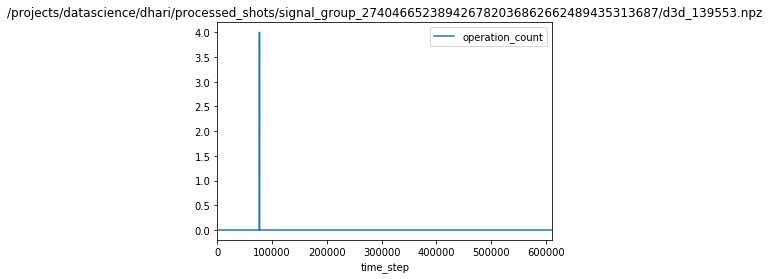

[============================================================] 100.0% 7 of 7 Creating Timeline 


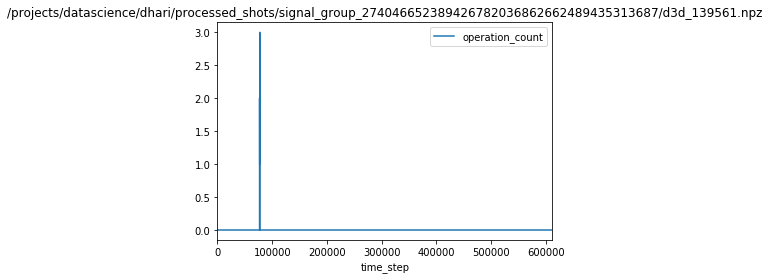

[============================================================] 100.0% 7 of 7 Creating Timeline 


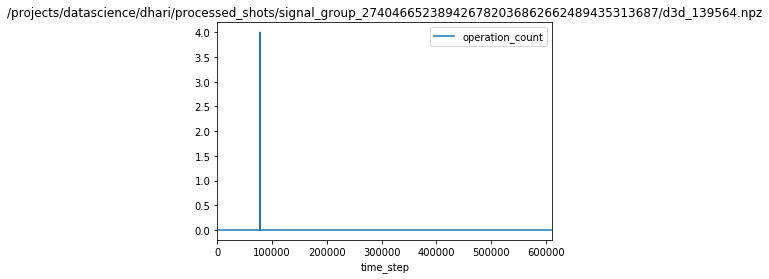

[============================================================] 100.0% 14 of 14 Creating Timeline 


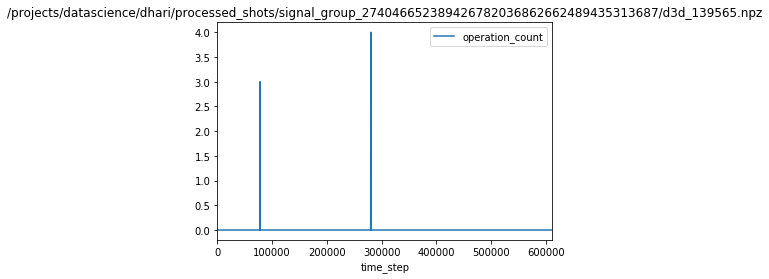

[============================================================] 100.0% 7 of 7 Creating Timeline 


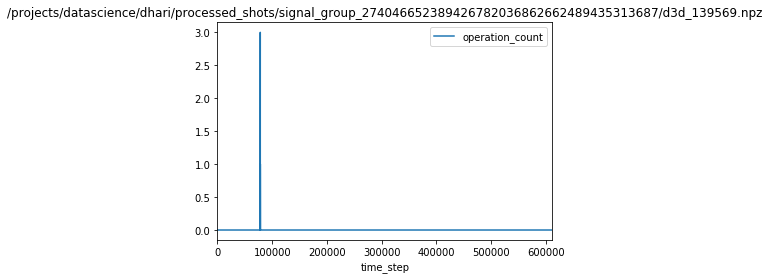

[============================================================] 100.0% 6 of 6 Creating Timeline 


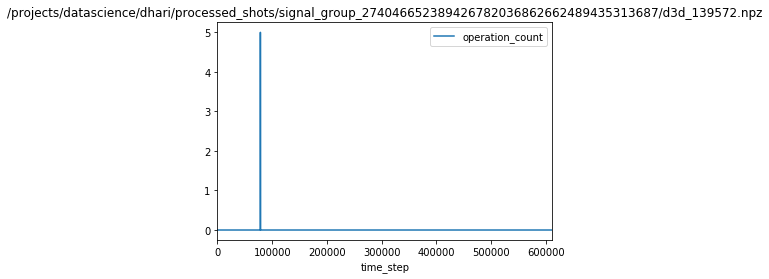

[============================================================] 100.0% 6 of 6 Creating Timeline 


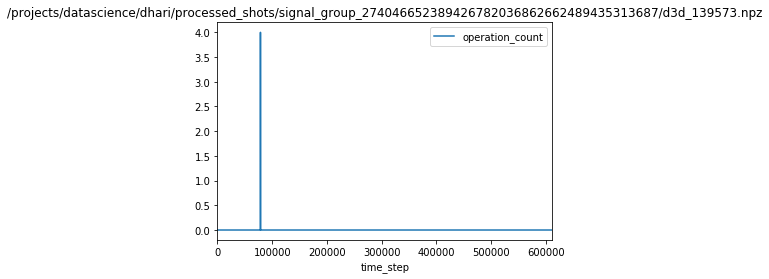

[============================================================] 100.0% 6 of 6 Creating Timeline 


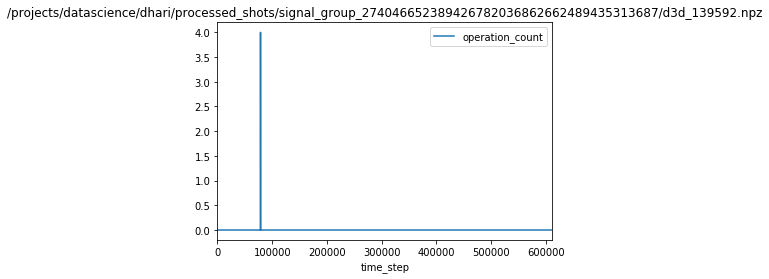

In [21]:
for file in df['Filename'].unique()[:20]:
    tl = profile.CreateIOTimeline(filepath=file,time_step=0.001)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

[============================================================] 100.0% 2918 of 2918 Creating Timeline 


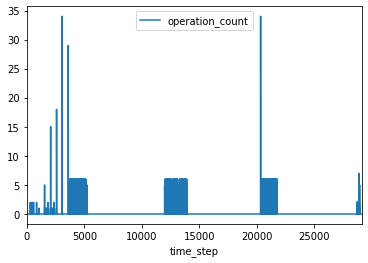

[============================================================] 100.0% 2753 of 2753 Creating Timeline 


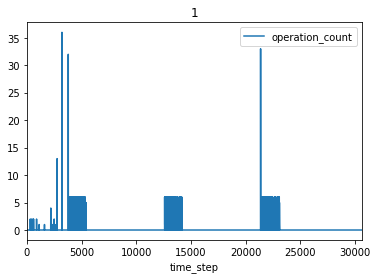

[============================================================] 100.0% 2752 of 2752 Creating Timeline 


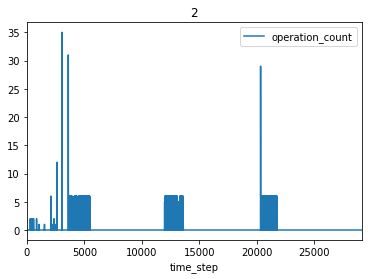

[============================================================] 100.0% 2799 of 2799 Creating Timeline 


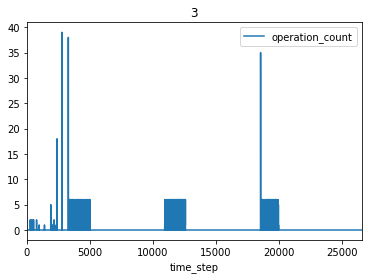

[============================================================] 100.0% 2785 of 2785 Creating Timeline 


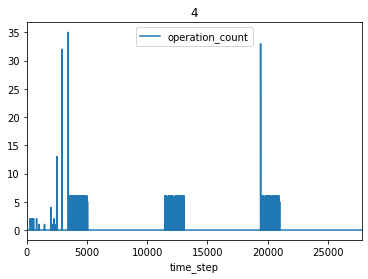

[============================================================] 100.0% 2774 of 2774 Creating Timeline 


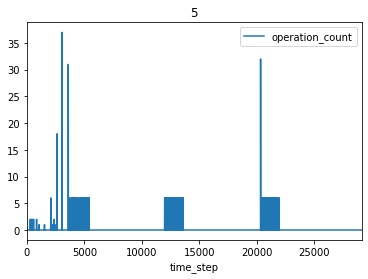

[============================================================] 100.0% 1935 of 1935 Creating Timeline 


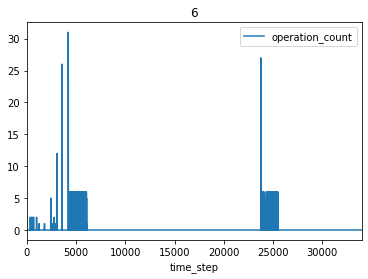

[============================================================] 100.0% 1135 of 1135 Creating Timeline 


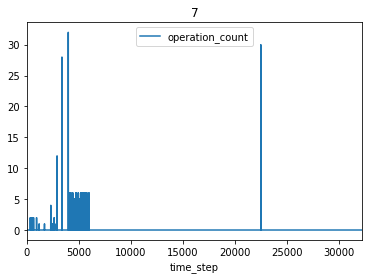

In [22]:
for rank in df['Rank'].unique()[:8]:
    tl = profile.CreateIOTimeline(rank=rank)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

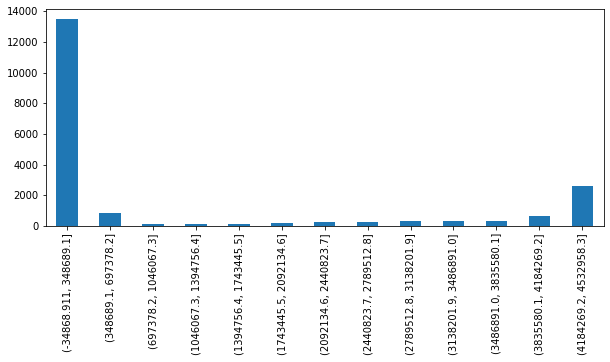

In [23]:
request_df = profile.GetIORequestDistribution(bins=100)
request_df.plot(kind='bar', figsize=(10, 4));

### Data Transfer Size distribution for each file.

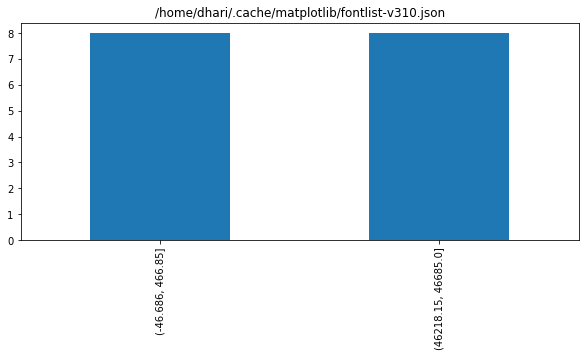

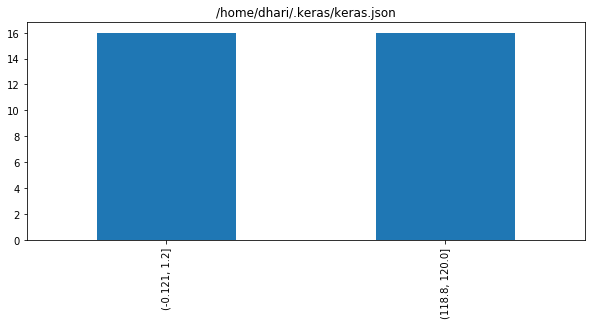

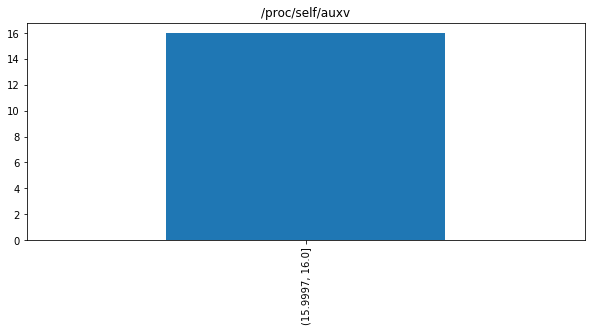

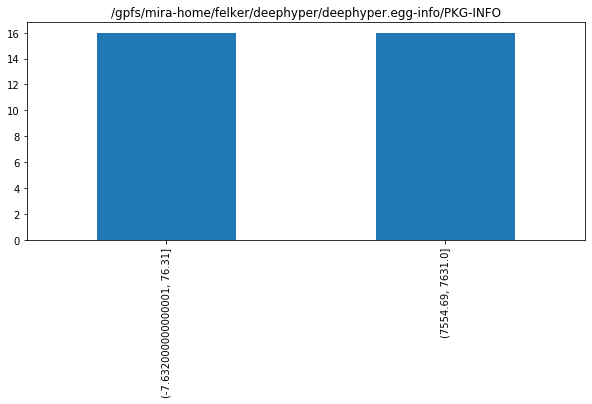

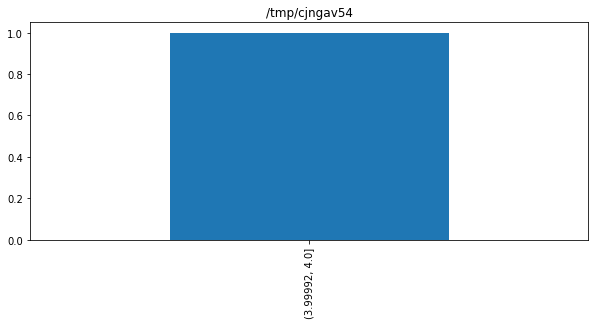

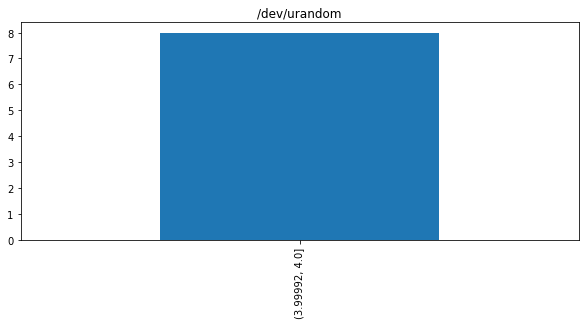

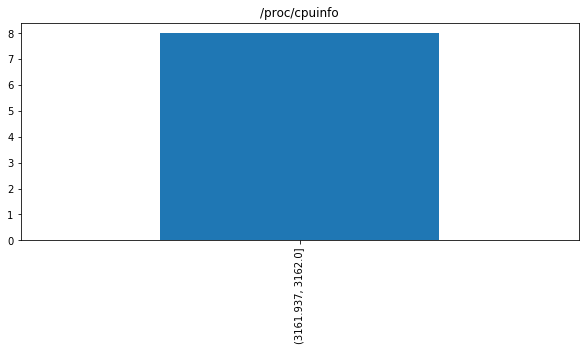

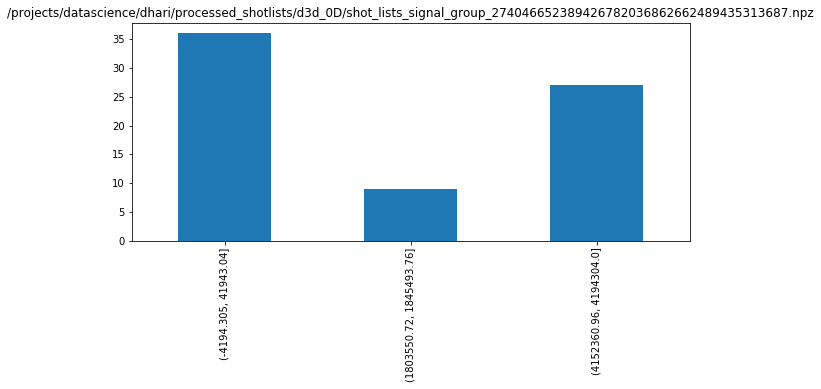

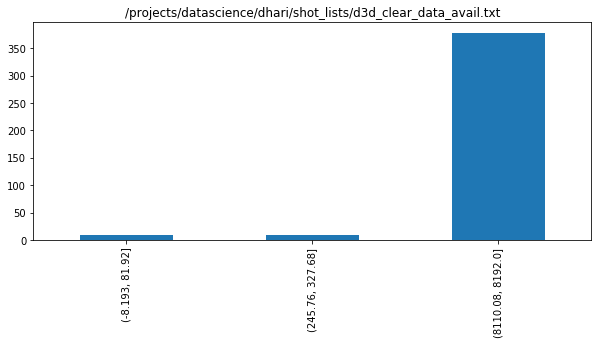

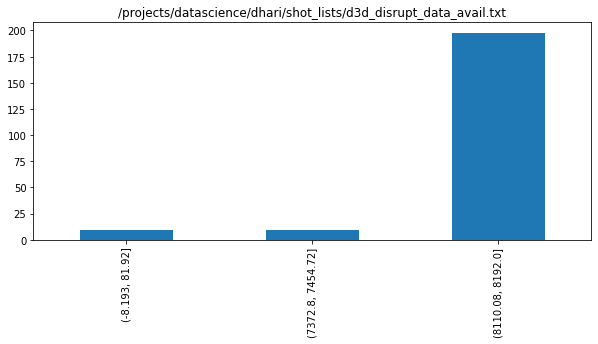

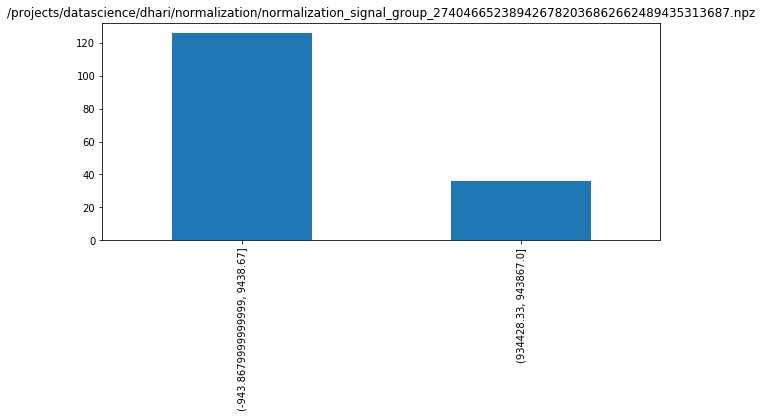

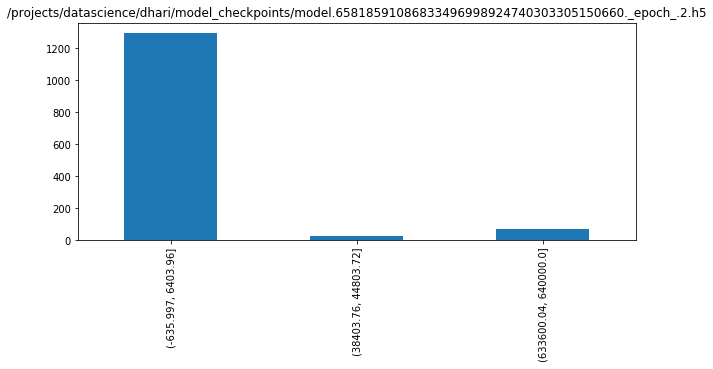

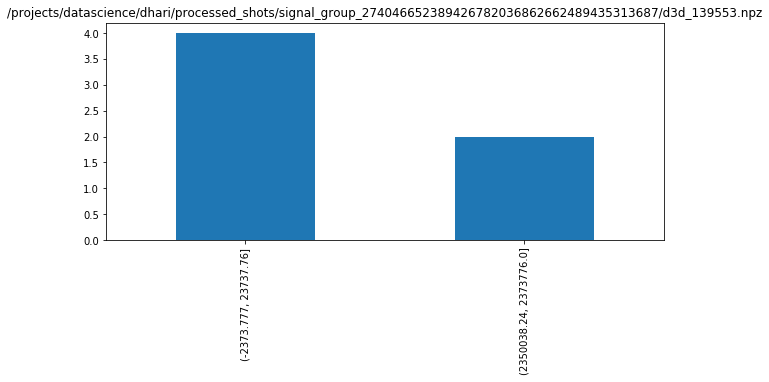

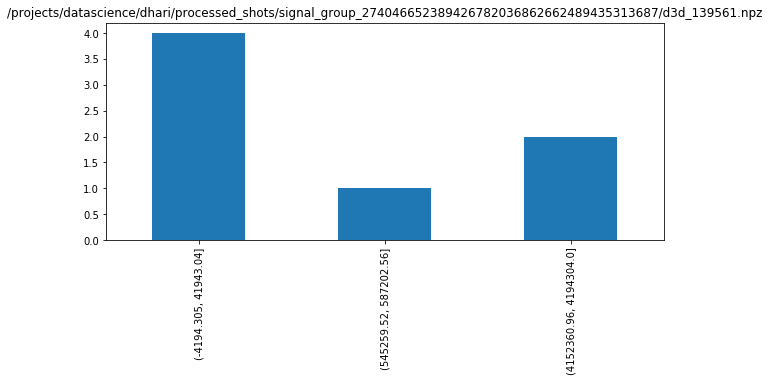

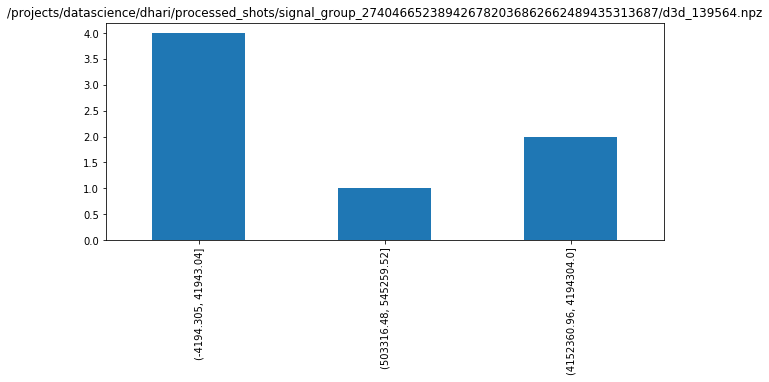

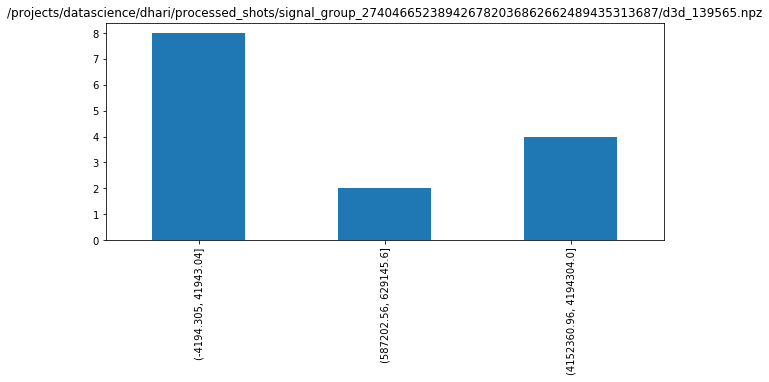

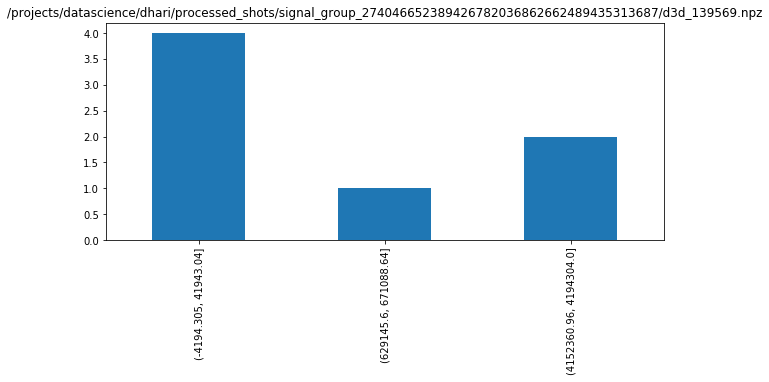

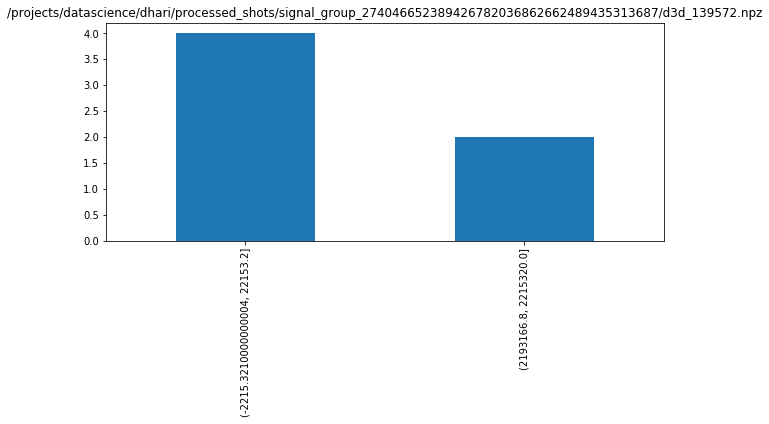

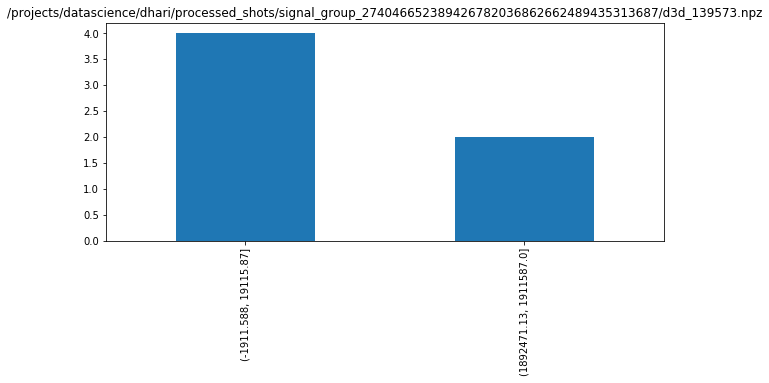

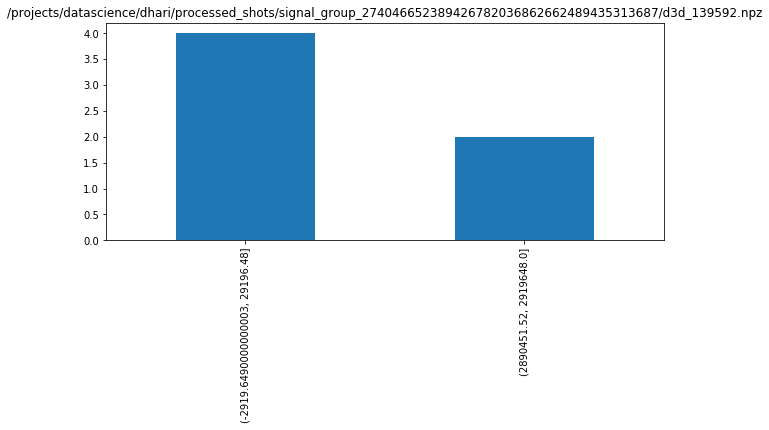

In [24]:
for file in df['Filename'].unique()[:20]:
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)
    plt.show()

### Data Transfer Sizes per Rank

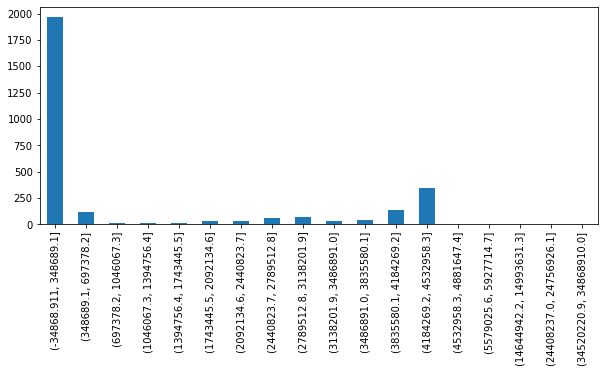

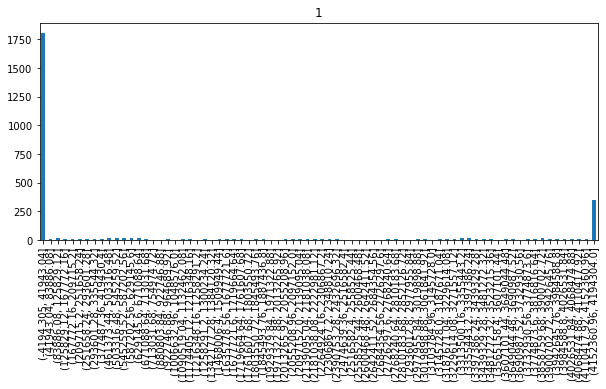

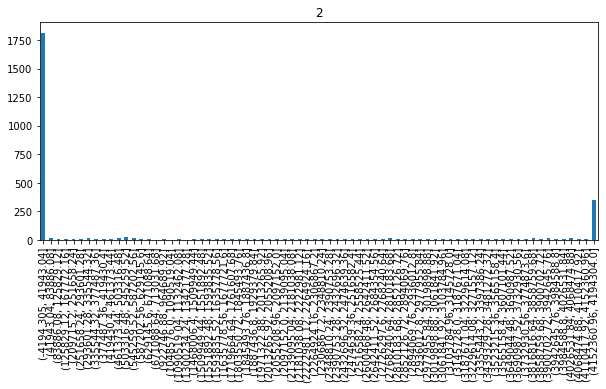

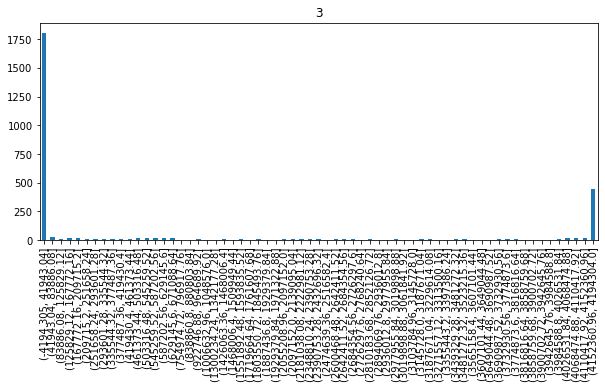

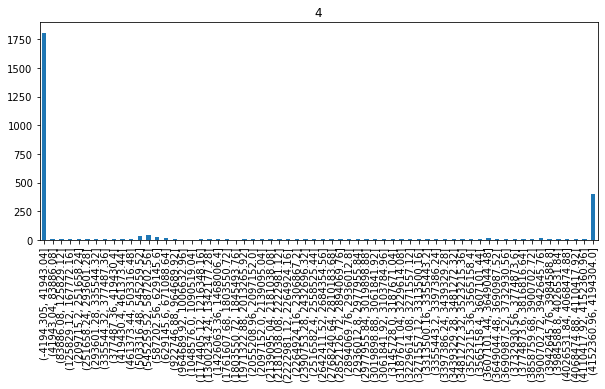

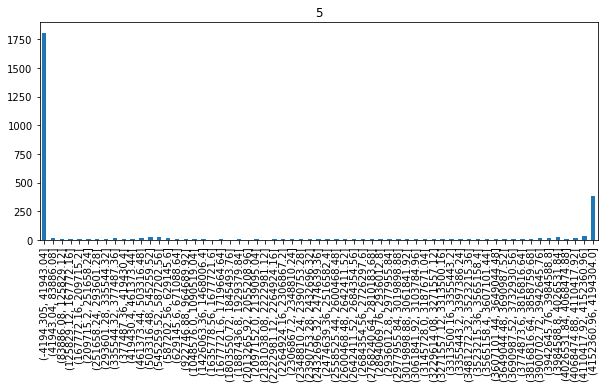

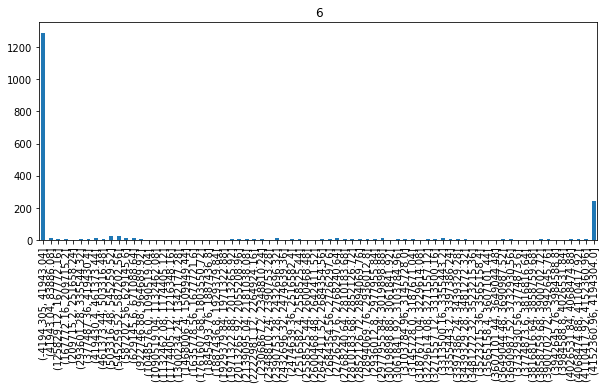

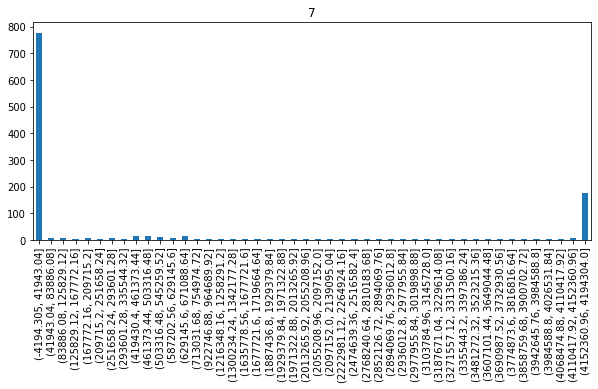

In [25]:
for rank in df['Rank'].unique()[:8]:
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [26]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique()[:8]:
    if os.path.exists(file):
        pp.pprint(profile.GetFileSummary(file))

{'ext': 'json',
 'filename': 'fontlist-v310',
 'io_size': 373480,
 'io_time': 0.0005624999999999796,
 'path': '/home/dhari/.cache/matplotlib/fontlist-v310.json',
 'size': 46685,
 'special': {}}
{'ext': 'json',
 'filename': 'keras',
 'io_size': 1920,
 'io_time': 0.0005499999999994536,
 'path': '/home/dhari/.keras/keras.json',
 'size': 120,
 'special': {}}
{'ext': '/proc/self/auxv',
 'filename': 'auxv',
 'io_size': 256,
 'io_time': 0.0016624999999999127,
 'path': '/proc/self/auxv',
 'size': 0,
 'special': {}}
{'ext': 'egg-info/PKG-INFO',
 'filename': 'PKG-INFO',
 'io_size': 122096,
 'io_time': 0.000787499999998678,
 'path': '/gpfs/mira-home/felker/deephyper/deephyper.egg-info/PKG-INFO',
 'size': 7631,
 'special': {}}
{'ext': '/dev/urandom',
 'filename': 'urandom',
 'io_size': 32,
 'io_time': 0.0005499999999989953,
 'path': '/dev/urandom',
 'size': 0,
 'special': {}}
{'ext': '/proc/cpuinfo',
 'filename': 'cpuinfo',
 'io_size': 25296,
 'io_time': 0.00019999999999953388,
 'path': '/proc/cpu